In [1]:
from calendar import c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bayesianLearner import BayesianLearner

In [2]:
dataset = pd.read_csv("data/Data_for_UCI_named.csv")
# The p1 attribute is a non predictive one (calculated based on the other p attributes)
dataset = dataset.drop('p1', axis=1)
# Drop the other target column
dataset = dataset.drop('stab', axis=1)

learner = BayesianLearner(dataset)
learner.learn()
learner.evaluate(dataset)

Counter({'unstable': 6380, 'stable': 3620})
unstable    7097
stable      2903
dtype: int64
Predicted  stable  unstable
Labels                     
stable       2427      1193
unstable      476      5904
Correctly classified instances: 8331
incorrectly classified instances: 1669
=== Detailed Accuracy for class unstable ===
Accuracy: 0.8331
Precision: 0.8319008031562632
Recall: 0.9253918495297806
F measure: 0.8761593826519254
True Positive Rate: 0.9253918495297806
False Positive Rate: 0.32955801104972376
K-Coefficent 0.6225030692830136
=== Detailed Accuracy for class stable ===
Accuracy: 0.8331
Precision: 0.836031691353772
Recall: 0.6704419889502763
F measure: 0.7441361336808217
True Positive Rate: 0.6704419889502763
False Positive Rate: 0.07460815047021943
K-Coefficent 0.6225030692830136


In [3]:

datasetIris = pd.read_csv("data/iris.csv")
learner = BayesianLearner(datasetIris)
learner.learn()
learner.evaluate(datasetIris)

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
Setosa        50
Versicolor    50
Virginica     50
dtype: int64
Predicted   Setosa  Versicolor  Virginica
Labels                                   
Setosa          50           0          0
Versicolor       0          47          3
Virginica        0           3         47
Correctly classified instances: 144
incorrectly classified instances: 6
=== Detailed Accuracy for class Setosa ===
Accuracy: 0.96
Precision: 1.0
Recall: 0.8928571428571429
F measure: 0.9433962264150945
True Positive Rate: 0.8928571428571429
False Positive Rate: 0.0
K-Coefficent 0.9126213592233009
=== Detailed Accuracy for class Versicolor ===
Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F measure: 0.94
True Positive Rate: 0.94
False Positive Rate: 0.03
K-Coefficent 0.9099999999999999
=== Detailed Accuracy for class Virginica ===
Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F measure: 0.94
True Positive Rate: 0.94
False Positive Rate: 0.03
K-Coefficent 0.9099999

In [ ]:
def crossValidate(dataset, groupNumber):
    if groupNumber <= 1:
        raise Exception("Set at least 2 cross-validation groups")
    
    cvPartition = len(dataset.shape[0]) // groupNumber
    initialRow = i * cvPartition
    finalRow = (i + 1) * cvPartition
    testSet = dataset[initialRow:finalRow]
    trainingSet = dataset.drop(dataset.index[initialRow:finalRow], axis = 0, inplace = False)
    cvLearner = BayesianLearner(trainingSet)
    cvLearner.learn()
    cvLearner.evaluate(testSet, verbose=False)

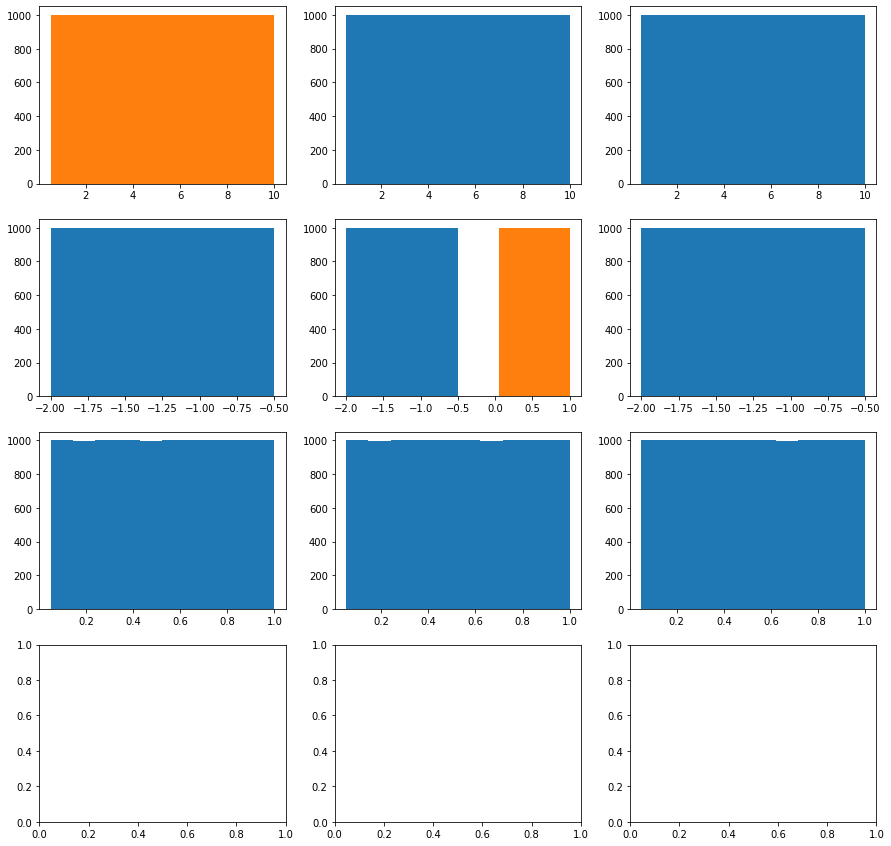

In [4]:
datasetNumerical = dataset.iloc[: , :-1]
fig, ax = plt.subplots(4,3, figsize=(15,15))

for i in range(datasetNumerical.shape[1]):
    if(i == 12):
        ax[3,2].hist(datasetNumerical.iloc[:,i])
    else:
        ax[int(i/4),i%3].hist(datasetNumerical.iloc[:,i])